<a href="https://colab.research.google.com/github/pareshrchaudhary/numericalmethods/blob/main/Derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Derivatives

Derivatives are about rates of change.

#### Setup

In [1]:
!git clone https://github.com/pareshrchaudhary/numericalmethods.git

Cloning into 'numericalmethods'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 161 (delta 22), reused 9 (delta 9), pack-reused 125
Receiving objects: 100% (161/161), 640.30 KiB | 5.87 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [2]:
import sys
sys.path.append("/content/numericalmethods")
import numpy as np
import matplotlib.pyplot as plt
import math
from numericalmethods import limits

## 1) Derivatives Idea

#### 1.1) Average rate of change

We know what average rate of change is and how to calculate it -

Average rate of change = $\frac{Δx}{Δy}$

Let's take an example.

> Say we drop a ball from the top of a building of height $h$ and it takes $t$ = 10 seconds for the ball to hit the ground. The displacement of the ball is governed by the function of motion given below.

Initial height is given by $h_0$, initial velocity is given by $v_0$ and $g$ is gravitational constant.

In [128]:
def f(t):
    """
    This function models the vertical displacement of a falling object with time.

    Input: t (float): Time in seconds.

    Output: float: Vertical displacement (height) in meters.
    """
    h_0 = 490.5
    v_0 = 0
    g = 9.81

    return h_0 + v_0 * t - 0.5 * g * t**2

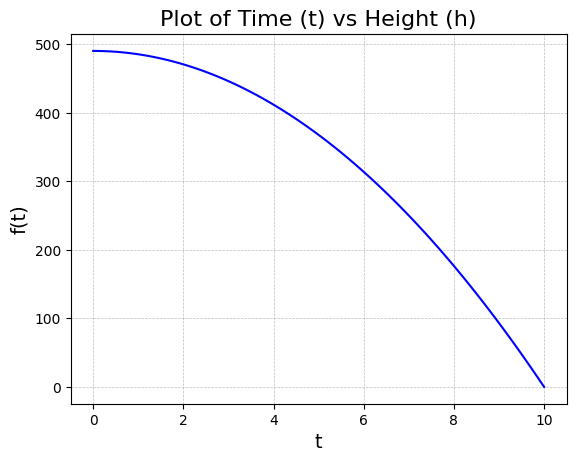

In [140]:
t = np.linspace(0, 10, 100)
fn = [f(i) for i in t]

plt.plot(t, fn, color='blue')
plt.xlabel('t', fontsize=14)
plt.ylabel('f(t)', fontsize=14)
plt.title('Plot of Time (t) vs Height (h)', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.show()

How can we calculate average rate of change of height(displacement)?
\
\
Average = $\frac{Δh}{Δt}$ = $\frac{h_2 - h_1}{t_2 - t_1}$

In [132]:
h_2 = f(6)
h_1 = f(0)
h_2, h_1

(313.91999999999996, 490.5)

In [133]:
average = (h_2-h_1)/(6-0)
average

-29.430000000000007

#### 1.2) Instantaneous rate of change

What if we want to calculate "_instantaneous_" rate of change at $t$ = 6?

In [198]:
instant = (f(6.1) - f(6))/(6.1 - 6)
instant

-59.35049999999954

Is this right?

No, that is just average rate of change in milliseconds. For the rate to be instantaneous we want the difference 6.1 - 6 to be so small that it will be very very close to 6.

We need the difference to tend to zero for getting instantaneous rate of change and how do we get that?

LIMITS ofcourse!!!
\
\
$\lim_{{x \to 6}} \frac{f(b) - f(6)}{b-6}$
\
\
**In simpler words, if we add a very very tiny value (almost close to zero) to the function at a given point, then how much does the function change at that point?**
\
\
$\lim_{{dx \to 0}} \frac{f(6+dx) - f(6)}{dx}$

In [199]:
point = 6
lim = limits.Limits()

In [200]:
def derivative_f(func, point):
  def fn(dx):
    return (func(point+dx) - func(point))/(dx)

  return lim.evaluate_limit(fn, 0)[1]

In [201]:
derivative_f(f, 6)

-58.85999999577507

#### 1.3) Geometric interpretation of derivatives

Equation of line: $y = m*x + c \implies (y_2 - y_1) = m* (x_2-x_1) + c$  
\
where $m$ = slope = $\frac{rise}{run} = \frac{Δx}{Δy} = \frac{f(b)-f(a)}{b-a}, c =$ intercept.

In [154]:
def draw_line(point1, point2, t):
  """
  Draw line using slope intercept form of line y = mx + c

  Input: point1, point2, scale

  Ouput: line points
  """
  slope = (point1[0] - point2[0]) / (point1[1] - point2[1])
  intercept = point1[0] - slope * point1[1]
  line = slope * t + intercept
  return line

We have two things to figure out geometrically-
1.   Average rate of change
2.   Instantaneous rate of change (Derivative)


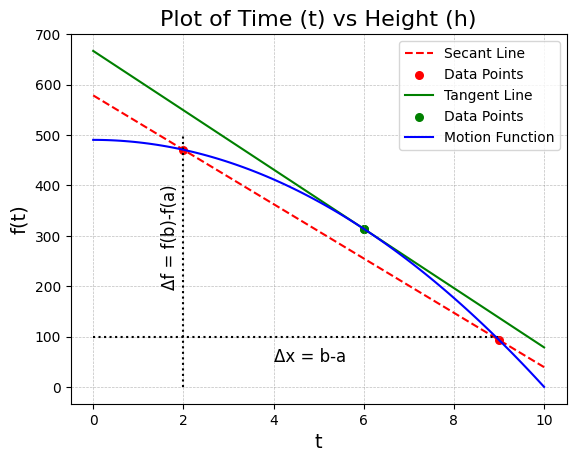

In [197]:
t = np.linspace(0, 10, 100)
fn = [f(i) for i in t]

h_1, t_1 = f(2), 2
h_2, t_2 = f(9), 9
secant_line = draw_line([h_1, t_1], [h_2, t_2], t)
plt.plot(t, secant_line, color='red', linestyle='--', label="Secant Line")
plt.plot([2,2], [0,500], color='black', linestyle=':')
plt.plot([0,9], [100,100], color='black', linestyle=':')
plt.text(4, 50, 'Δx = b-a', fontsize=12, color='black')
plt.text(1.5, 200, 'Δf = f(b)-f(a)', fontsize=12, color='black', rotation=90)
plt.scatter([t_1, t_2], [h_1, h_2], c='red', marker='o', s=30, label='Data Points')

h_1, t_1 = f(6), 6
h_2, t_2 = f(6.0000001), 6.0000001
tangent_line = draw_line([h_1, t_1], [h_2, t_2], t)
plt.plot(t, tangent_line, color='green', linestyle='-', label="Tangent Line")
plt.scatter([t_1, t_2], [h_1, h_2], c='green', marker='o', s=30, label='Data Points')

plt.plot(t, fn, color='blue', label='Motion Function')
plt.xlabel('t', fontsize=14)
plt.ylabel('f(t)', fontsize=14)
plt.title('Plot of Time (t) vs Height (h)', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend()
plt.show()

Both the red dots approach the green dot and eventually the secant line turn into a tangent line.

Secant Line: $y = \frac{f(b)-f(a)}{b-a} *(x-a) + f(a)$


Tangent Line: $y = f'(a) *(x-a) + f(a)$

As $b \to a$,
*   **Physical**:  _Average rate of change_ $\to$ _Instantaneous rate of change_
*   **Geometric**:  _Secant Line_ $\to$ _Tangent Line_
*   **Symbolic**:  $\frac{f(b)-f(a)}{b-a} \to f'(a)$


#### 1.4) Derivative

**The derivative of $f(x)$ at $x = a$ represents the instantaneous rate of change of $f(x)$ at $x = a$**


**$f'(x) = \lim_{{dx \to 0}} \frac{f(x+dx) - f(x)}{dx}$**

## 2) Derivative as a function